# Predicting Telco Customer Churn
Churn quantifies the number of customers who have unsubscribed or canceled their service contract. It is expensive for a business to win them back once lost and potentially damaging to the reputation of the organisation if these customers leave unsatisfied and willing to tell others. 

The method for predicting customer churn is a supervised learning method using data from the past. More specifically, we find customers that have already churned (response) and their characteristics (predictors) before the churn occurred. Using this historical data, we fit a model that finds a relationship between the predictors to the reponse. 

<br>
<center><img src='../img/overview.png'></center>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams

sns.set(style='ticks', color_codes=True)
pd.set_option('display.max_columns', None)
%matplotlib inline

### 1. Exploratory Data Analysis
Before we can perform analysis or even clean the data, we need to understand what is going on in the raw dataset. First we will check out the shape and structure of the dataset then we can begin converting the data types of the fields which require it as well as replacing any erroneous data as needed.

In [2]:
# read the csv into pandas dataframe
raw_data = pd.read_csv('data/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

# see the shape and data types of the dataset
print(raw_data.dtypes, '\n')
print('dataframe shape: ', raw_data.shape, '\n')
raw_data.head(5)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object 

dataframe shape:  (7043, 21) 



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 1.1 Dataset Description
In the Telco customer dataset, each row in the dataset represents a single customer and each column describes individual aspects of the service. The final column, `Churn` indicates whether or not the customer ceased their relationship with the business in the last month.

In [3]:
df_customers = raw_data

# find how many total customers in dataset 
ncustomers = len(df_customers.index)
# find how many churned
nchurned = df_customers[df_customers['Churn']=='Yes'].shape[0]

print('Total customers : %s \nTotal churned   : %s \n' %(ncustomers, nchurned))

# find the churn rate
churn_rate = float(nchurned) / ncustomers * 100

print('Churn rate : {}%'.format(round(churn_rate,2)))

Total customers : 7043 
Total churned   : 1869 

Churn rate : 26.54%


#### 1.2. Data cleaning/processing
There are a number of columns which use `['Yes','No']` or some other variation that could be represented as integers or enums depending on our development methods. We can either clean data before or after visualising the dataset in the EDA phase. In this case, we will do it before. 

In [4]:
# rather than guessing what it could be, we remove rows with erroneous data
df_customers = df_customers[df_customers['TotalCharges'] != ' ']

# cast data types
df_customers.TotalCharges = df_customers.TotalCharges.astype('float')
df_customers.SeniorCitizen = df_customers.SeniorCitizen.astype('category')

# replacing yes/no/other values to to ints for later use in algorithms
df_customers['gender'].replace(['Male','Female'],[0,1],inplace=True)
df_customers['Partner'].replace(['Yes','No'],[1,0],inplace=True)
df_customers['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
df_customers['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
df_customers['MultipleLines'].replace(['Yes','No phone service','No'],[1,0,0],inplace=True)
df_customers['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
df_customers['OnlineSecurity'].replace(['Yes','No','No internet service'],[1,0,0],inplace=True)
df_customers['OnlineBackup'].replace(['Yes','No','No internet service'],[1,0,0],inplace=True)
df_customers['DeviceProtection'].replace(['Yes','No','No internet service'],[1,0,0],inplace=True)
df_customers['TechSupport'].replace(['Yes','No','No internet service'],[1,0,0],inplace=True)
df_customers['StreamingTV'].replace(['Yes','No','No internet service'],[1,0,0],inplace=True)
df_customers['StreamingMovies'].replace(['Yes','No','No internet service'],[1,0,0],inplace=True)
df_customers['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
df_customers['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
df_customers['PaymentMethod'].replace(['Electronic check','Mailed check','Bank transfer (automatic)',
                                       'Credit card (automatic)'],[0,1,2,3],inplace=True)
df_customers['Churn'].replace(['Yes','No'],[1,0],inplace=True)

# remove unecessary field
df_customers.pop('customerID')

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7032, dtype: object

#### 1.3 Visual Descriptive Analysis
Now that we know what is in the dataset as well as some rough numbers regarding the rate of churn, it is time to look at other variables to see what we can learn. Throughout the notebook, <b><font color='blue'>blue</font></b> is used for loyal customers and <b><font color='red'>red</font></b> will represent disloyal customers.

In [7]:
loyal_customers = df_customers[df_customers['Churn'] == 0]
disloyal_customers = df_customers[df_customers['Churn'] == 1]

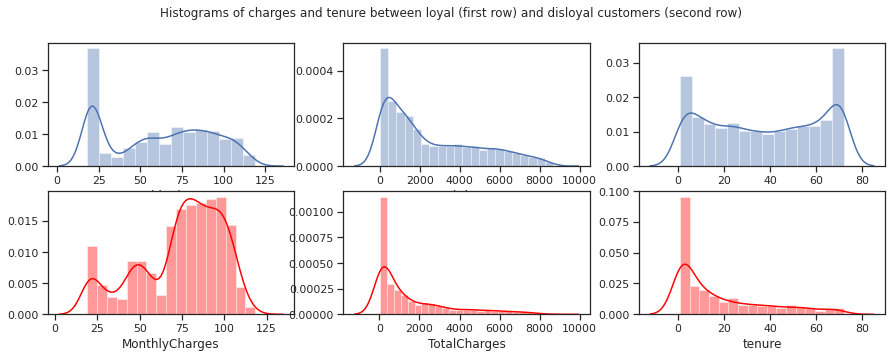

In [8]:
dims = (15, 5)
fig, ax = plt.subplots(2,3,figsize=dims)
plt.suptitle('Histograms of charges and tenure between loyal (first row) and disloyal customers (second row)')

# loyal customers
sns.distplot(loyal_customers.MonthlyCharges, ax=ax[0, 0])
sns.distplot(loyal_customers.TotalCharges, ax=ax[0, 1])
sns.distplot(loyal_customers.tenure, ax=ax[0,2])

# disloyal customers
sns.distplot(disloyal_customers.MonthlyCharges, ax=ax[1, 0], color='red')
sns.distplot(disloyal_customers.TotalCharges, ax=ax[1, 1], color='red')
sns.distplot(disloyal_customers.tenure, ax=ax[1,2], color='red')

plt.savefig('charges_and_tenure.jpg')

The above plots tell a story. We observe the first set of charts for `MonthlyCharges` that for loyal customers, a large segment pay between `$20 - $25` per month whereas disloyal customers pay `$75 - $110`. This indicates that cheaper monthly charges are a potential deciding factor in whether or not a customer remains with the company.

In the case of `TotalCharges`, we see heavily skewed results with most customers in both groups having paid almost no charges.

For `tenure`, we observe that the sum of both groups indicate that most customers leave early. In the loyal customer group, there is a large bin of persons who remain with the company for around 70 years.

Now we should get some exact numbers on the `max()` and `min()` of each group.

In [15]:
# MonthlyCharges
max_month_charges = df_customers['MonthlyCharges'].max()
min_month_charges = df_customers['MonthlyCharges'].min()

# TotalCharges
max_total_charges = df_customers['TotalCharges'].max()
min_total_charges = df_customers['TotalCharges'].min()

# tenure
max_tenure = df_customers['tenure'].max()
min_tenure = df_customers['tenure'].min()

print('Max monthly charges: %s \nMin monthly charges : %s \n' %(max_month_charges, min_month_charges))
print('Max total charges: %s \nMin total charges : %s \n' %(max_total_charges, min_total_charges))
print('Max tenure: %s \nMin tenure : %s' %(max_tenure, min_tenure))

Max monthly charges: 118.75 
Min monthly charges : 18.25 

Max total charges: 8684.8 
Min total charges : 18.8 

Max tenure: 72 
Min tenure : 1
